Loading a new session in Google Colab will generally require you to load the data again
The outputs csv for each park has been saved to a mounted Google Drive using an email created for this project:
team.97.project@gmail.com

The cell below will mount the drive for you - however, it may require authorization.
The additional login credentials required are:
Team972019

In [160]:
##START HERE TO LOAD REVIEW DATA

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING DATA**


    1. Import data files = trip_advisor_review_files/*.csv
    2. Concatenate all separate csv files into a panda dataframe

In [0]:
#imports
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from collections import Counter
import numpy as np
import datetime
import seaborn as sns
import time

In [162]:
#load all review data from csv's in mounted GoogleDrive
import os
from os import listdir
from os.path import isfile
import glob
import pandas as pd
#set path
os.chdir('/content/drive/My Drive/trip_advisor_review_files')

#set variable as path
mypath = '/content/drive/My Drive/trip_advisor_review_files/'

#set all file names to variable
files = glob.glob('/content/drive/My Drive/trip_advisor_review_files/*.csv')
print("The number of parks in the Google Drive is:" + str(len(files)))

#for each file name - replace the folder path and keep only the file name in a list
csv_names = []
for file in files:
    csv_n = file.replace(mypath, '')

    csv_names.append(csv_n)

#import all files in pandas data frame

merged_reviews = pd.DataFrame()

df_from_each_file = (pd.read_csv(csv) for csv in csv_names)
merged_reviews   = pd.concat(df_from_each_file, ignore_index=True)

merged_reviews.head()


The number of parks in the Google Drive is:61


,national_park,review_body,review_date,review_title,helpful_vote,user_location,user_rating
0,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,"October 18, 2019",A Palce Indeed,49,"Kent, Washington",5
1,Cliff Palace,Informative tour! The ranger did a good job of...,"October 18, 2019",Throughly enjoyed our group tour with ranger,101,"Brookhaven, Georgia",4
2,Cliff Palace,I visited wonders of the World Machu Piccu and...,"October 16, 2019",Amazing,18,"Delden, The Netherlands",5
3,Cliff Palace,You could not walk all they way down because i...,"October 13, 2019",See the whole park,0,"Central Arizona, Arizona",5
4,Cliff Palace,"Exceptional, breathtaking and amazing! You wil...","October 10, 2019",MUST SEE IF YOU ARE IN THE AREA1,43,"Springfield, Missouri",5


**GETTING YEAR OF REVIEWS FOR GROUPING**
  
    1.Extract year from review_date column
    2.Create new column[review_year] in pandas dataframe with years

In [163]:
#################ADDING YEAR TO TABLE

merged_reviews.review_date = pd.to_datetime(merged_reviews.review_date, infer_datetime_format = True)
#year
merged_reviews['review_year'] = merged_reviews.review_date.dt.year
merged_reviews['review_day'] = merged_reviews.review_date.dt.day
merged_reviews['review_month'] = merged_reviews.review_date.dt.month
merged_reviews['review_year'].astype(int)
merged_reviews['review_day'].astype(int)
merged_reviews['review_month'].astype(int)
merged_reviews.head()


,national_park,review_body,review_date,review_title,helpful_vote,user_location,user_rating,review_year,review_day,review_month
0,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019-10-18,A Palce Indeed,49,"Kent, Washington",5,2019,18,10
1,Cliff Palace,Informative tour! The ranger did a good job of...,2019-10-18,Throughly enjoyed our group tour with ranger,101,"Brookhaven, Georgia",4,2019,18,10
2,Cliff Palace,I visited wonders of the World Machu Piccu and...,2019-10-16,Amazing,18,"Delden, The Netherlands",5,2019,16,10
3,Cliff Palace,You could not walk all they way down because i...,2019-10-13,See the whole park,0,"Central Arizona, Arizona",5,2019,13,10
4,Cliff Palace,"Exceptional, breathtaking and amazing! You wil...",2019-10-10,MUST SEE IF YOU ARE IN THE AREA1,43,"Springfield, Missouri",5,2019,10,10


In [164]:
merged_reviews['category_mapping'] = merged_reviews.national_park.astype("category").cat.codes
cat_numerical = np.sort(merged_reviews.category_mapping.unique())
merged_reviews.head()

,national_park,review_body,review_date,review_title,helpful_vote,user_location,user_rating,review_year,review_day,review_month,category_mapping
0,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019-10-18,A Palce Indeed,49,"Kent, Washington",5,2019,18,10,11
1,Cliff Palace,Informative tour! The ranger did a good job of...,2019-10-18,Throughly enjoyed our group tour with ranger,101,"Brookhaven, Georgia",4,2019,18,10,11
2,Cliff Palace,I visited wonders of the World Machu Piccu and...,2019-10-16,Amazing,18,"Delden, The Netherlands",5,2019,16,10,11
3,Cliff Palace,You could not walk all they way down because i...,2019-10-13,See the whole park,0,"Central Arizona, Arizona",5,2019,13,10,11
4,Cliff Palace,"Exceptional, breathtaking and amazing! You wil...",2019-10-10,MUST SEE IF YOU ARE IN THE AREA1,43,"Springfield, Missouri",5,2019,10,10,11


In [165]:
#####Understand Helpful vote
mean = merged_reviews.helpful_vote.mean()
stats = merged_reviews.helpful_vote.describe(percentiles = [.25, .50,.75,.80,.90])
max_vote= merged_reviews.helpful_vote.max()
max_df = merged_reviews[merged_reviews.helpful_vote == max_vote]
print(max_df.iloc[0,1]) 

There are more than 300 famous geysers included among the hydrothermal wonders of Yellowstone National Park. There are lots to things to see and do in the park, such as going for walks on the boardwalks adjacent to geysers, camping, learning about the microbes living in the extremely hot waters, and more. 


In [166]:
#max helpful vote row
max_df

,national_park,review_body,review_date,review_title,helpful_vote,user_location,user_rating,review_year,review_day,review_month,category_mapping
113969,Yellowstone National Park,There are more than 300 famous geysers include...,2019-09-11,A geyser wonderland,83946,"Yekaterinburg, Russia",5,2019,11,9,58


In [167]:
stats = merged_reviews.helpful_vote.describe(percentiles = [.25, .50,.75,.80,.90,.99])
top_ = stats['99%']
top_df = merged_reviews[merged_reviews.helpful_vote >= top_]
top_df.groupby(['national_park']).size().sort_values(ascending=False)

national_park
Grand Canyon South Rim                                        142
The Gateway Arch                                               64
Bryce Canyon National Park                                     58
Hawaii Volcanoes National Park                                 54
Yosemite Valley                                                52
Haleakala Crater                                               47
Grand Teton                                                    39
Going-to-the-Sun Road                                          38
Painted Desert                                                 34
Arches National Park                                           32
Crater Lake National Park                                      31
Dante's View                                                   31
Denali                                                         27
Mammoth Cave                                                   25
Zion's Main Canyon                                            

In [168]:
####Understand unique number of ratings 
ratings_df = merged_reviews.groupby(['review_year','category_mapping','national_park','user_rating']).size().sort_values(ascending=False).reset_index(name='count')
ratings_df.head()

,review_year,category_mapping,national_park,user_rating,count
0,2015,21,Grand Canyon South Rim,5,2967
1,2016,21,Grand Canyon South Rim,5,2638
2,2016,1,Arches National Park,5,2500
3,2014,21,Grand Canyon South Rim,5,1983
4,2017,1,Arches National Park,5,1931


In [169]:
rate_5 = ratings_df[ratings_df.user_rating == 5]
rate_4 = ratings_df[ratings_df.user_rating == 4]
rate_3 = ratings_df[ratings_df.user_rating == 3]
rate_2 = ratings_df[ratings_df.user_rating == 2]
rate_1 = ratings_df[ratings_df.user_rating == 1]
unique_rating = np.sort(ratings_df.user_rating.unique())
rate_1.head()

,review_year,category_mapping,national_park,user_rating,count
535,2016,53,The Gateway Arch,1,25
560,2015,53,The Gateway Arch,1,22
618,2017,53,The Gateway Arch,1,18
758,2018,53,The Gateway Arch,1,12
828,2015,21,Grand Canyon South Rim,1,10


In [170]:
piv1 = pd.pivot_table(rate_1, values="count",index=["national_park"], columns=["review_year"], fill_value=0)
piv1.reset_index(inplace=False)
piv2 = pd.pivot_table(rate_2, values="count",index=["national_park"], columns=["review_year"], fill_value=0)
piv2.reset_index(inplace=False)
piv3 = pd.pivot_table(rate_3, values="count",index=["national_park"], columns=["review_year"], fill_value=0)
piv3.reset_index(inplace=False)
piv4 = pd.pivot_table(rate_4, values="count",index=["national_park"], columns=["review_year"], fill_value=0)
piv4.reset_index(inplace=False)
piv5 = pd.pivot_table(rate_5, values="count",index=["national_park"], columns=["review_year"], fill_value=0)
piv5.reset_index(inplace=False)

review_year,national_park,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Acadia National Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,722,439
1,Arches National Park,0,0,0,0,0,0,0,0,0,0,0,1,2,589,2500,1931,1424,983
2,Badlands National Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,178,210,141
3,Big Room,0,0,0,0,0,0,0,2,9,20,71,74,84,137,124,130,81,52
4,Biscayne National Park,0,0,0,0,0,0,0,0,0,2,5,5,11,12,41,44,45,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Wind Cave National Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,99,90,32
57,Wrangell-St. Elias National Park & Preserve Vi...,0,0,0,0,0,0,0,0,0,0,0,3,6,15,10,10,11,6
58,Yellowstone National Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,287,426,309
59,Yosemite Valley,0,0,2,1,3,2,8,14,17,45,273,318,471,812,757,573,320,204


In [0]:
  #####HEATMAP
def heatmap(piv, title = '',x_label='',y_label='',size=(16,13)):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.heatmap(piv, linewidths=0.1, annot=True, fmt='g')
    ax.set_ylim(len(piv)+0.5, -.5)
    ax.text(1,1,title, transform=ax.transAxes,size=20, horizontalalignment='right',verticalalignment='bottom')
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.tight_layout()
    plt.show()

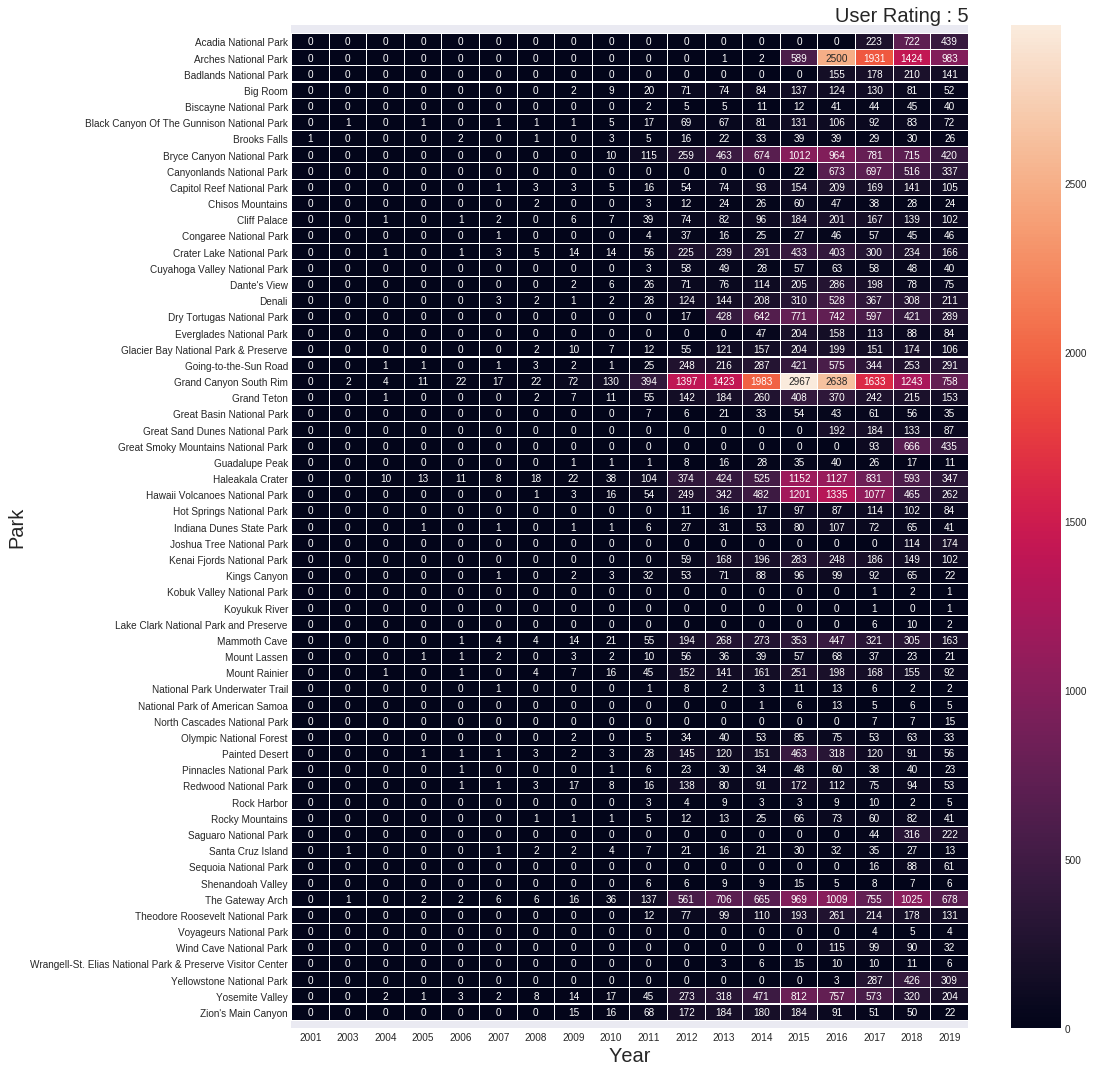

In [172]:
heatmap(piv5,title='User Rating : 5',x_label='Year', y_label='Park', size = (16,15))


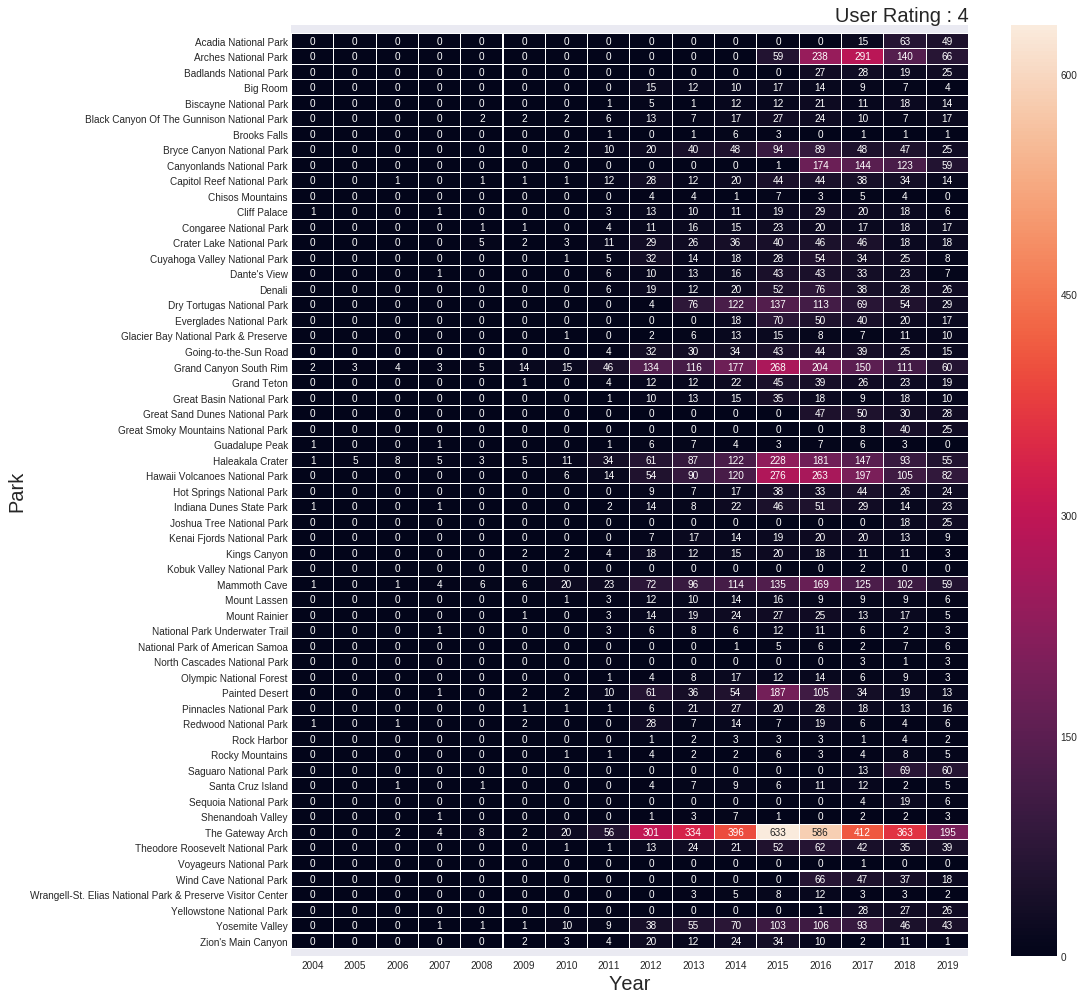

In [173]:
heatmap(piv4,title='User Rating : 4',x_label='Year', y_label='Park', size = (16,14))


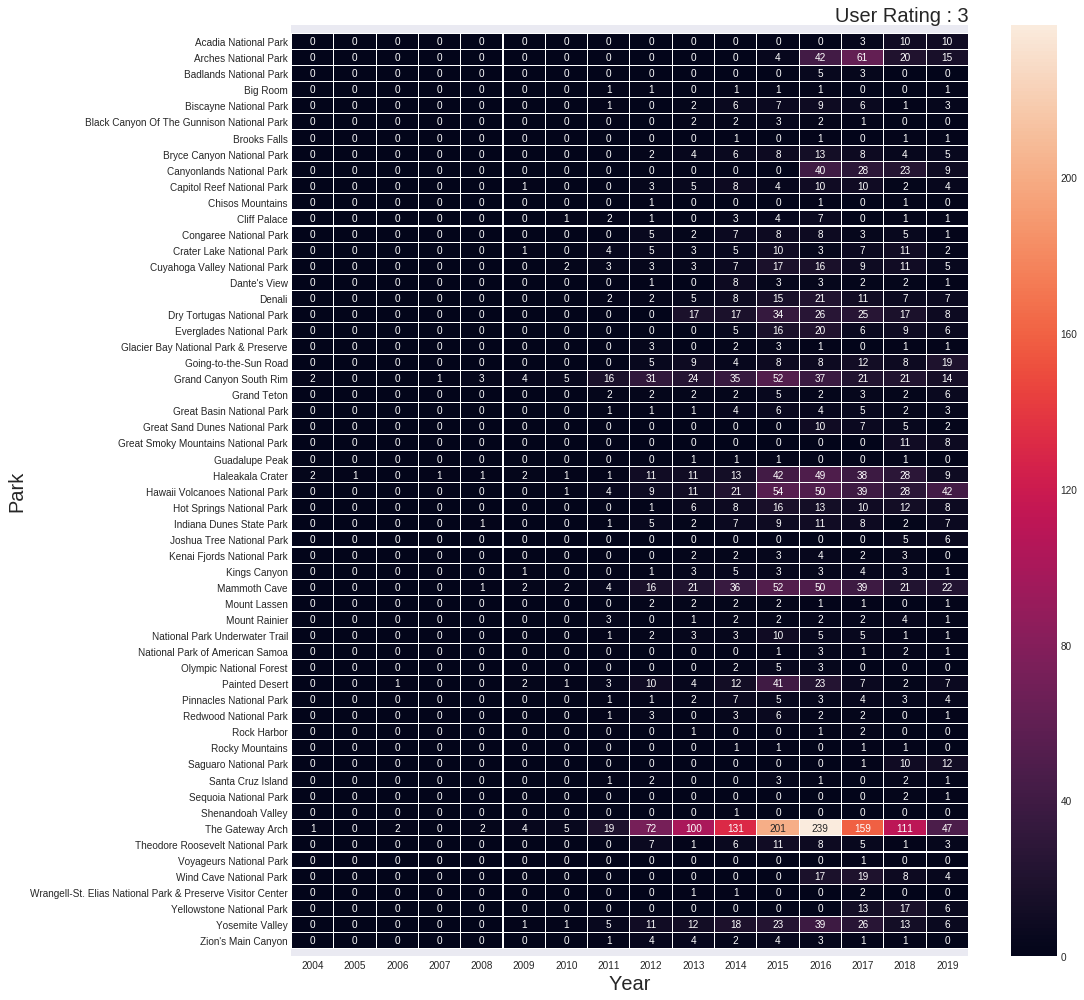

In [174]:
heatmap(piv3,title='User Rating : 3',x_label='Year', y_label='Park', size = (16,14))

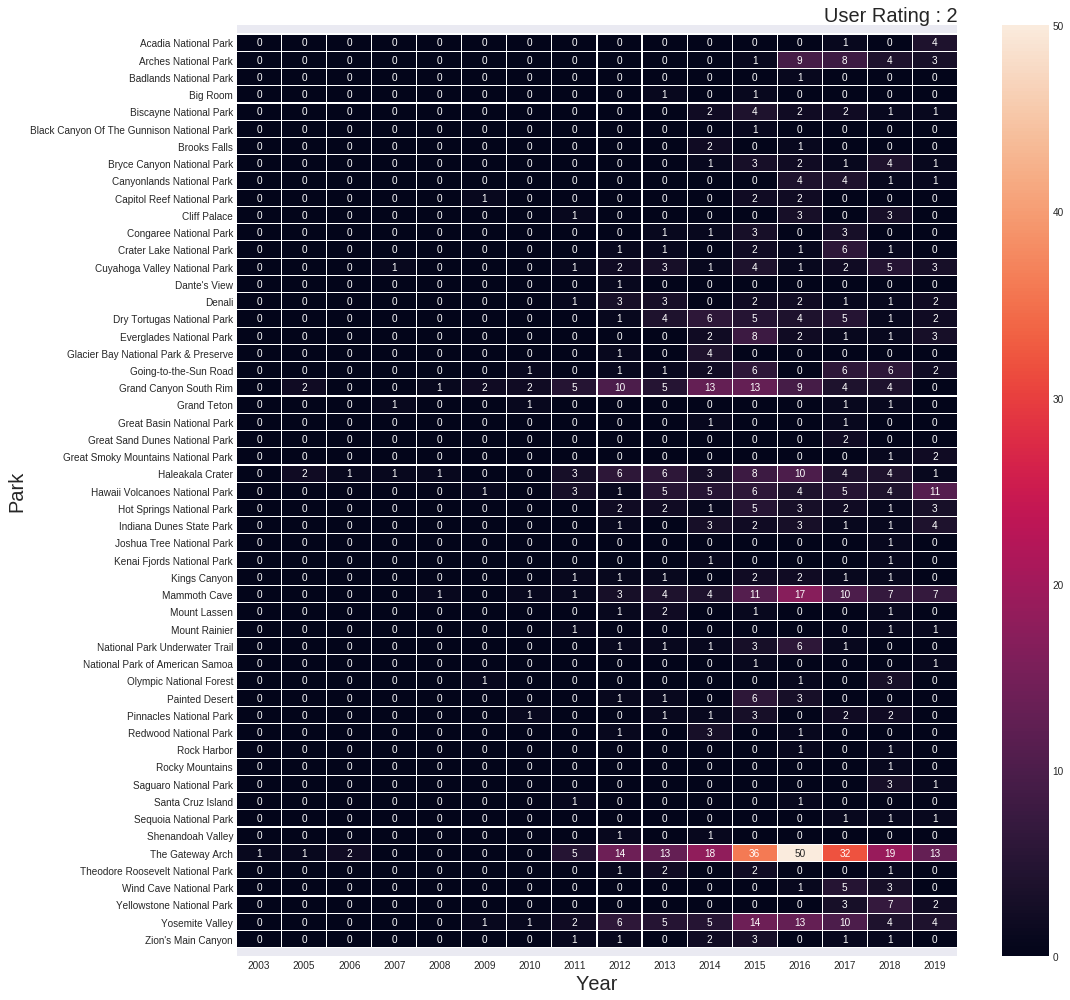

In [175]:
heatmap(piv2,title='User Rating : 2',x_label='Year', y_label='Park', size = (16,14))

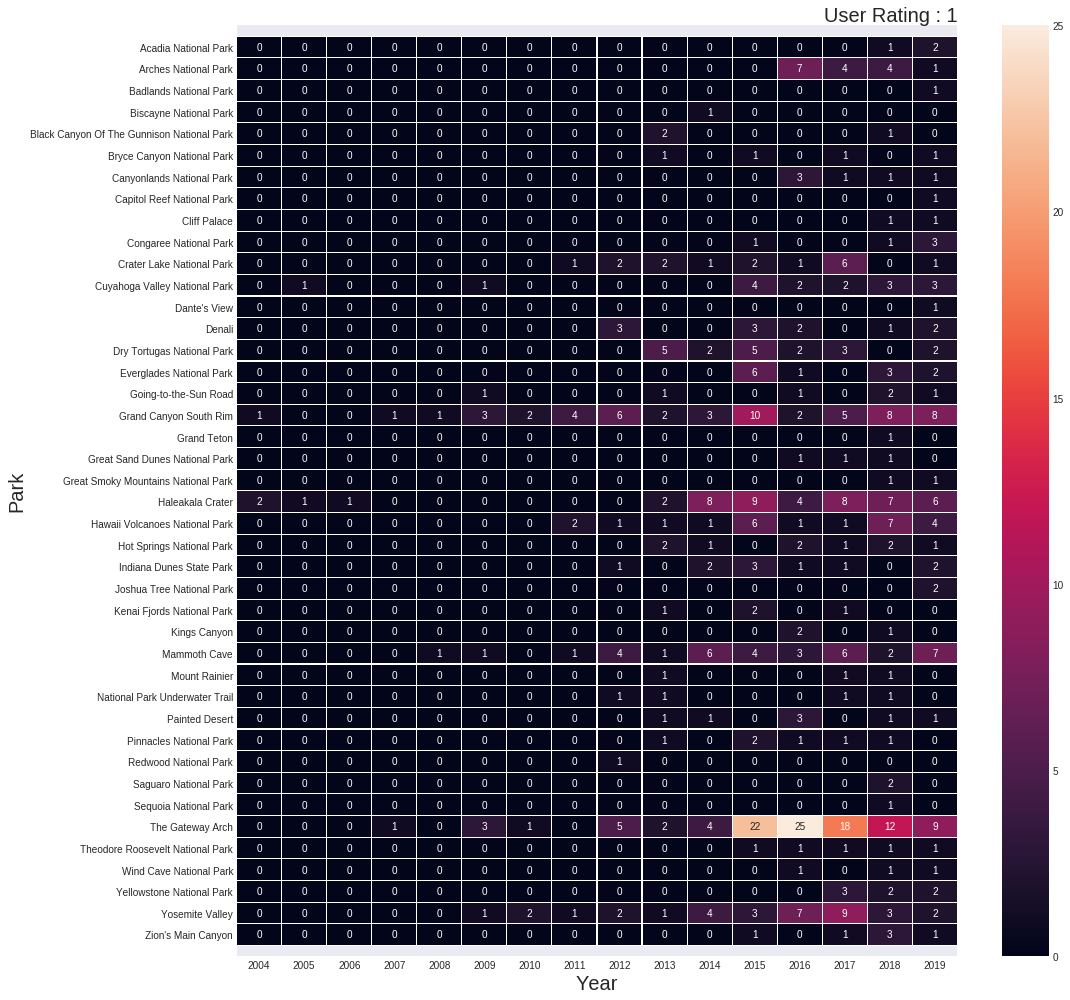

In [176]:
heatmap(piv1,title='User Rating : 1',x_label='Year', y_label='Park', size = (16,14))

In [177]:
####Generating reviews count by month throughout data years for heatmap
df = merged_reviews.groupby(['review_year','review_month']).size().sort_values(ascending=False).reset_index(name='count')

piv = pd.pivot_table(df, values="count",index=["review_month"], columns=["review_year"], fill_value=0)

piv.reset_index(inplace=False)
piv

review_year,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
review_month,,,,,,,,,,,,,,,,,,
1,0,0,0,3,13,6,5,9,13,29,353,419,365,855,1057,888,751,515
2,0,0,2,2,3,2,6,9,13,23,261,342,314,838,972,828,645,460
3,0,0,1,5,3,4,9,6,12,38,648,480,431,1096,1359,1142,991,778
4,0,0,4,1,1,4,10,17,30,46,550,617,605,1107,1648,1468,1118,884
5,0,0,4,6,4,9,14,18,43,32,447,708,730,1402,1965,1665,1269,1087
6,0,0,5,4,4,12,15,21,62,141,684,907,1159,2145,2711,1993,1994,1320
7,1,2,3,9,8,10,24,39,61,197,1046,1316,1570,2859,3278,2434,2362,1702
8,0,0,5,5,7,12,19,31,68,257,856,1081,1534,2305,2824,2074,2121,1439
9,0,2,5,1,12,9,11,28,55,336,825,1158,1609,2399,2648,1887,1593,1451


# **Visualizing Dataset**


---
Using heatmap and barcharts to understand where reviews are more frequently written throughout the years.


---



In [178]:
index= np.sort(merged_reviews['review_month'].unique())
cols = np.sort(merged_reviews['review_year'].unique())
years = np.arange(min(cols)-1,max(cols)+2,1)
months =np.arange(min(index),max(index)+1,1)
years, months

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

Text(126.5, 0.5, 'Month')

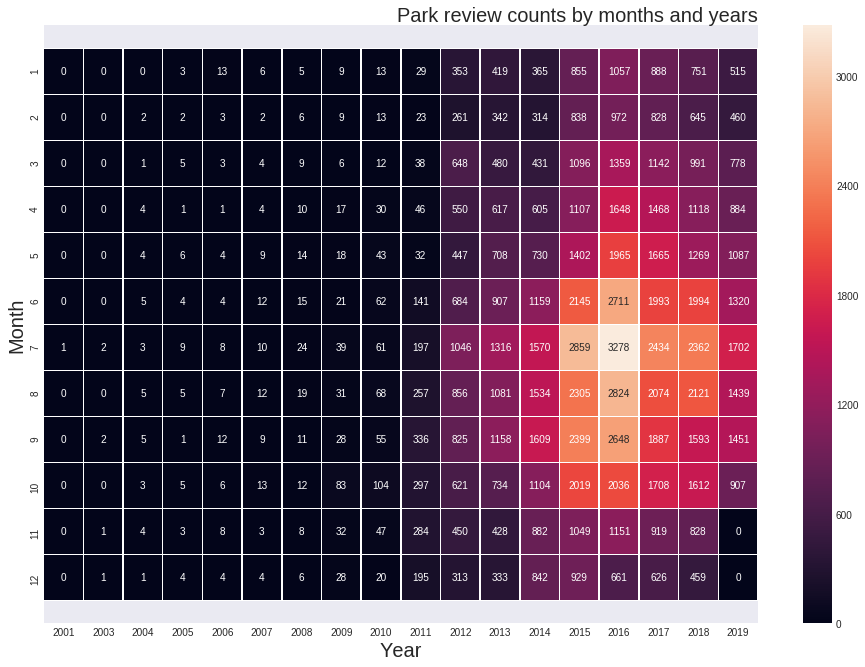

In [179]:
#####HEATMAP
fig, ax = plt.subplots(figsize=(16,11))
ax = sns.heatmap(piv, linewidths=0.5, annot=True, fmt='g')
ax.set_ylim(len(piv)+0.5, -.5)
ax.text(1,1,'Park review counts by months and years', transform=ax.transAxes,size=20, horizontalalignment='right',verticalalignment='bottom')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Month", fontsize=20)

In [181]:
monthly_count = merged_reviews.groupby(['review_month'])['review_body'].count().reset_index()
monthly_count['month_name'] = pd.to_datetime(monthly_count['review_month'], format='%m').dt.month_name()
monthly_count

,review_month,review_body,month_name
0,1,5281,January
1,2,4720,February
2,3,7003,March
3,4,8110,April
4,5,9403,May
5,6,13177,June
6,7,16921,July
7,8,14638,August
8,9,14029,September
9,10,11264,October


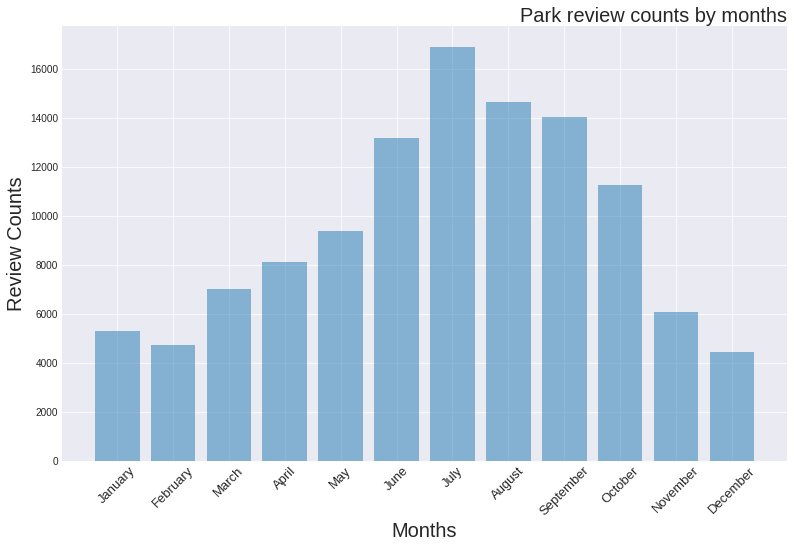

In [182]:
#plot barchart with reviews count by month
# create figure and axes
fig, ax = plt.subplots(figsize=(13,8))
x, y, xlabels = monthly_count.review_month,monthly_count.review_body, monthly_count.month_name
# plot the barchart
ax.bar(x, y, alpha = 0.5)

#iterate over values to plot counts
# for i, (value,name) in enumerate(zip(monthly_count.review_body,monthly_count.review_month)):
#   ax.text(value,i,value,ha='left')



# Add x and y lables, and set their font size
plt.xlabel("Months", fontsize=20)
plt.ylabel("Review Counts", fontsize=20)

xticks = np.arange(min(x),max(x)+1,1)
plt.xticks(xticks , xlabels, fontsize=13, rotation=45)
plt.yticks(fontsize=10)


#add year right bottom portion of canvas

ax.text(1,1,'Park review counts by months', transform=ax.transAxes,size=20, horizontalalignment='right',verticalalignment='bottom')
ax.grid(color='white', linestyle='-', axis='y')


In [183]:
#creating copy of dataframe
data_copy = merged_reviews.copy()
total_rows = data_copy.shape[0]
total_columns = data_copy.shape[1]
print(f'Total Number of Review Rows: {total_rows} \nTotal Number of Feature Columns: {total_columns}')

Total Number of Review Rows: 115069 
Total Number of Feature Columns: 11


In [184]:
#check total count of reviews by park
total_reviews_by_park = data_copy.groupby(['national_park'])['review_body'].count().reset_index()
# review_counts = pd.DataFrame(total_reviews_by_park, columns=['Parks','Review Count'])
# review_counts.head()
total_reviews_by_park = total_reviews_by_park.sort_values(by = 'review_body', ascending=True)
total_reviews_by_park

,national_park,review_body
35,Koyukuk River,2
34,Kobuk Valley National Park,6
55,Voyageurs National Park,15
36,Lake Clark National Park and Preserve,18
42,North Cascades National Park,36
...,...,...
27,Haleakala Crater,6951
28,Hawaii Volcanoes National Park,7022
1,Arches National Park,8407
53,The Gateway Arch,11285


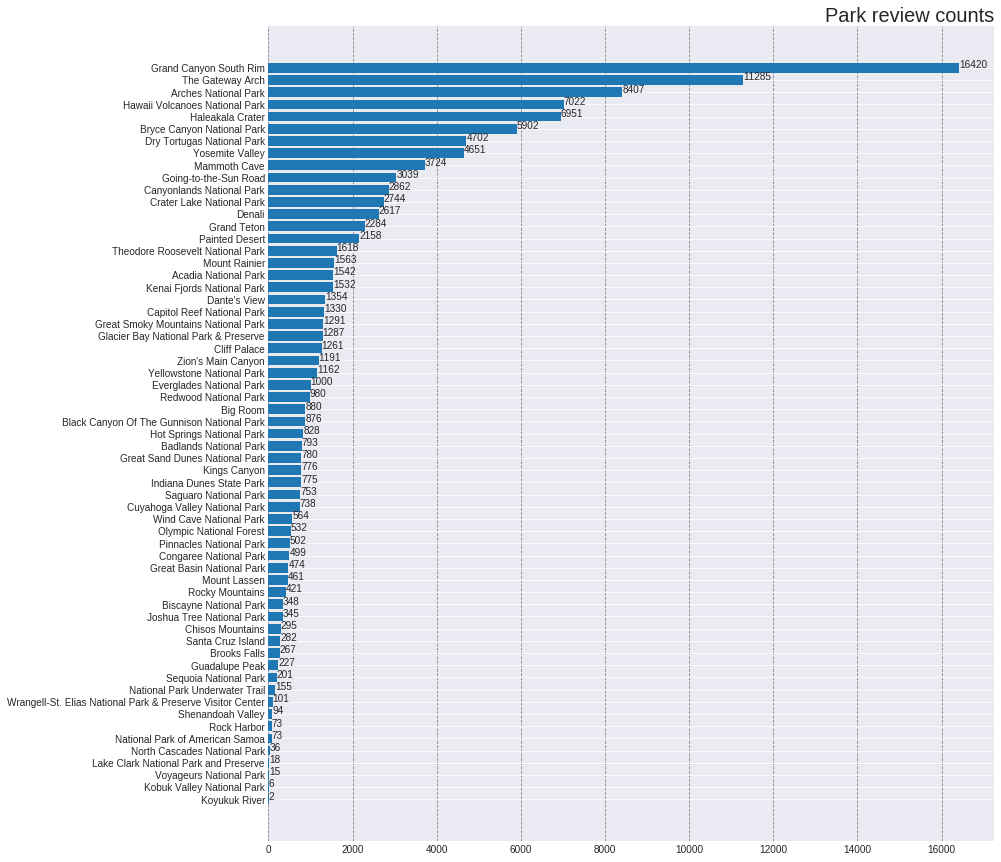

In [185]:
#plot barchart with reviews count by park
# create figure and axes
fig, ax = plt.subplots(figsize=(13,15))

# plot the barchart
ax.barh(total_reviews_by_park['national_park'],total_reviews_by_park['review_body'])

#iterate over values to plot counts
for i, (value,name) in enumerate(zip(total_reviews_by_park['review_body'], total_reviews_by_park['national_park'])):
  ax.text(value,i,value,ha='left') 


#add year right bottom portion of canvas

ax.text(1,1,'Park review counts', transform=ax.transAxes,size=20, horizontalalignment='right',verticalalignment='bottom')
ax.grid(color='gray', linestyle='--', axis='x')

# plt.savefig("park_review_counts.png")

In [186]:
#check total count of reviews by park
reviews_yearly = data_copy.groupby(['national_park','review_year'])['review_body'].count().reset_index()

reviews_yearly.head()

,national_park,review_year,review_body
0,Acadia National Park,2017,242
1,Acadia National Park,2018,796
2,Acadia National Park,2019,504
3,Arches National Park,2013,1
4,Arches National Park,2014,2


In [187]:
reviews_by_year = reviews_yearly.pivot_table(columns='national_park',index='review_year',values='review_body')

reviews_by_year.reset_index(inplace=True)
#reviews_by_year.set_index('review_year', inplace=True)
reviews_by_year.fillna(0, inplace=True)
reviews_by_year['review_year'] = pd.to_datetime(reviews_by_year.review_year, format='%Y')
reviews_by_year.head()

national_park,review_year,Acadia National Park,Arches National Park,Badlands National Park,Big Room,Biscayne National Park,Black Canyon Of The Gunnison National Park,Brooks Falls,Bryce Canyon National Park,Canyonlands National Park,Capitol Reef National Park,Chisos Mountains,Cliff Palace,Congaree National Park,Crater Lake National Park,Cuyahoga Valley National Park,Dante's View,Denali,Dry Tortugas National Park,Everglades National Park,Glacier Bay National Park & Preserve,Going-to-the-Sun Road,Grand Canyon South Rim,Grand Teton,Great Basin National Park,Great Sand Dunes National Park,Great Smoky Mountains National Park,Guadalupe Peak,Haleakala Crater,Hawaii Volcanoes National Park,Hot Springs National Park,Indiana Dunes State Park,Joshua Tree National Park,Kenai Fjords National Park,Kings Canyon,Kobuk Valley National Park,Koyukuk River,Lake Clark National Park and Preserve,Mammoth Cave,Mount Lassen,Mount Rainier,National Park Underwater Trail,National Park of American Samoa,North Cascades National Park,Olympic National Forest,Painted Desert,Pinnacles National Park,Redwood National Park,Rock Harbor,Rocky Mountains,Saguaro National Park,Santa Cruz Island,Sequoia National Park,Shenandoah Valley,The Gateway Arch,Theodore Roosevelt National Park,Voyageurs National Park,Wind Cave National Park,Wrangell-St. Elias National Park & Preserve Visitor Center,Yellowstone National Park,Yosemite Valley,Zion's Main Canyon
0,2001-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,2005-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2006-01-01,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [188]:
###get mean of total park reviews to separate the top half to understand trend of reviews thru time
mean_reviews = total_reviews_by_park['review_body'].mean() 
top = total_reviews_by_park[total_reviews_by_park.review_body > mean_reviews]
top_parks = top['national_park'].values
top_parks

array(['Painted Desert', 'Grand Teton', 'Denali',
       'Crater Lake National Park', 'Canyonlands National Park',
       'Going-to-the-Sun Road', 'Mammoth Cave', 'Yosemite Valley',
       'Dry Tortugas National Park', 'Bryce Canyon National Park',
       'Haleakala Crater', 'Hawaii Volcanoes National Park',
       'Arches National Park', 'The Gateway Arch',
       'Grand Canyon South Rim'], dtype=object)

In [189]:
#separating upper half of top reviewed parks 
reviews_by_year_top = reviews_by_year[reviews_by_year.columns.intersection(top_parks)]
dates = reviews_by_year['review_year']
reviews_by_year_top = reviews_by_year_top.join(dates)
reviews_by_year_top.head()


,Arches National Park,Bryce Canyon National Park,Canyonlands National Park,Crater Lake National Park,Denali,Dry Tortugas National Park,Going-to-the-Sun Road,Grand Canyon South Rim,Grand Teton,Haleakala Crater,Hawaii Volcanoes National Park,Mammoth Cave,Painted Desert,The Gateway Arch,Yosemite Valley,review_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001-01-01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2003-01-01
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,1.0,15.0,0.0,1.0,0.0,1.0,2.0,2004-01-01
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0,22.0,0.0,0.0,1.0,3.0,1.0,2005-01-01
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,0.0,21.0,0.0,2.0,2.0,8.0,3.0,2006-01-01


In [190]:
###get colors
def get_cmap(n, name='hsv'):
  return plt.cm.get_cmap(name,n)

cmap = get_cmap(len(top_parks))
cmap

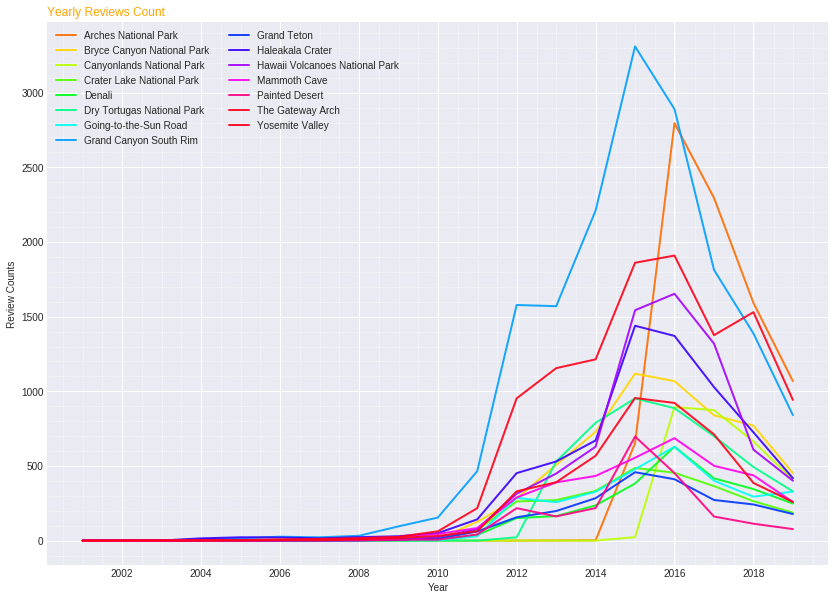

In [191]:
#generating line graph to plot user review trends
import matplotlib.dates as mdates
# style
plt.style.use('seaborn-darkgrid')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

date = reviews_by_year_top['review_year']

plt.subplots(figsize=(14,10))
# multiple line plot
num=0
for column in reviews_by_year_top.drop('review_year', axis=1):
  num+=1
  plt.plot(reviews_by_year_top['review_year'], reviews_by_year_top[column], marker='', color=cmap(num), linewidth=2, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Yearly Reviews Count", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Review Counts")
plt.grid(True)
ax.set_axisbelow(True)
plt.grid(which='major', linestyle='-', linewidth='1', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='white')
plt.minorticks_on()

***Table - review text***


park : year : word : POS : count 


***Table - review title text***

park : year : word : POS : count 



***Table - ratings***

year : park : helpful_votes : user_ratings : user_rating_counts == helpful_votes_counts by each rating



# **DATA TRANSFORMATION**


---


We want to retrieve the individual words of each review text body. We will apply Spacy Package https://spacy.io/usage/spacy-101 to uncover the individual words. We will also assess whether a word is considered a "stop-word". In a language "stop-words" are generally considered the most common words with little relevant added value to our task. https://en.wikipedia.org/wiki/Stop_words  



---



In [192]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
#import spacy and load english language nlp package

import spacy
nlp = spacy.load('en')

In [204]:
data_copy.groupby(['national_park','review_year']).first()

review_body  ... category_mapping
national_park        review_year                                                     ...                 
Acadia National Park 2017         From the Town Pier you can walk along the way ...  ...                0
                     2018         Really a worth while place to visit. Several a...  ...                0
                     2019         Take your time in the area and allow at least ...  ...                0
Arches National Park 2013         I visited Arches Nat. Park in late October 201...  ...                1
                     2014         We spent today driving through the Arches and ...  ...                1
...                                                                             ...  ...              ...
Zion's Main Canyon   2015         We had just over a day to explore Zion and we ...  ...               60
                     2016         very nice place to climb and make a walk. Grea...  ...               60
                     2017         This is truly beautiful canyon, full of color,...  ...               60
                     2018         We're very happy we took the time to visit Zio...  ...               60
                     2019         It's somewhat difficult to describe what we sa...  ...               60

[600 rows x 9 columns]

In [0]:
##########SPACY example

reviews = "Mesa Verde's Cliff Palace House is can't gotta not to be missed. $50,000. The It is an easy a.m. hike. Unlike Long-House- you do beauty- not get to go i-5 inside the ruins. But can't, you do get to view up close. Very awesome."
#TOKEN CLASS EXPOSES A LOT OF WORD-LEVEL ATTRIBUTES
doc = nlp(reviews)
 
for token in doc:
  print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}".format(
    token.text,
    token.idx,
      token.lemma_,
      token.is_punct,
      token.is_space,
      token.shape_,
      token.pos_,
      token.tag_,
      token.is_stop
  ))

## **GENERATING WORDS FOR REVIEW TITLES**


---
Using Spacy to tokenize review texts, and get parts of speech.


In [205]:
####Get Review Title words
data_review_title = data_copy[['national_park','review_title','review_year']]
data_review_title


,national_park,review_title,review_year
0,Cliff Palace,A Palce Indeed,2019
1,Cliff Palace,Throughly enjoyed our group tour with ranger,2019
2,Cliff Palace,Amazing,2019
3,Cliff Palace,See the whole park,2019
4,Cliff Palace,MUST SEE IF YOU ARE IN THE AREA1,2019
...,...,...,...
115064,Yellowstone National Park,nature at it's most amazing,2017
115065,Yellowstone National Park,Something to see,2016
115066,Yellowstone National Park,Super National Park experience,2016
115067,Yellowstone National Park,Great scenic views and unique interests,2016


In [0]:
###creating function to filter tokens from text
def token_filter(token):
  return not (token.is_punct | token.is_space | token.is_stop | len(token.text) <=3 )

In [0]:
###creating spacy pipe to run filtering tokens and getting parts of speech 
def clean_token(df,column):
  docs = df[str(column)].tolist()
  filtered_tokens = []
  pos_tokens = []
  startime = time.time()
  for doc in nlp.pipe(docs):
    tokens = [token.text for token in doc if token_filter(token)]
    pos = [token.pos_ for token in doc if token_filter(token)]
    filtered_tokens.append(tokens)
    pos_tokens.append(pos)

  end_time = time.time() - startime
  
  print(f'running time : {end_time/60}')
  return filtered_tokens, pos_tokens

In [208]:
###running function on dataframe to clean
filtered_,pos_ = clean_token(data_review_title,'review_title')

running time : 2.0595096429189046


In [209]:
###adding results from spacy to dataframe
data_review_title['tokens'] = filtered_


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
data_review_title

,national_park,review_title,review_year,tokens
0,Cliff Palace,A Palce Indeed,2019,"[Palce, Indeed]"
1,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,"[Throughly, enjoyed, group, tour, with, ranger]"
2,Cliff Palace,Amazing,2019,[Amazing]
3,Cliff Palace,See the whole park,2019,"[whole, park]"
4,Cliff Palace,MUST SEE IF YOU ARE IN THE AREA1,2019,"[MUST, AREA1]"
...,...,...,...,...
115064,Yellowstone National Park,nature at it's most amazing,2017,"[nature, most, amazing]"
115065,Yellowstone National Park,Something to see,2016,[Something]
115066,Yellowstone National Park,Super National Park experience,2016,"[Super, National, Park, experience]"
115067,Yellowstone National Park,Great scenic views and unique interests,2016,"[Great, scenic, views, unique, interests]"


In [0]:
###putting all words from reviews into separate rows
data_review_title = data_review_title.explode('tokens').reset_index(drop=True)

In [0]:
###make all words lower for part of speech tagging
data_review_title['tokens'] = data_review_title['tokens'].str.lower()

In [213]:
data_review_title

,national_park,review_title,review_year,tokens
0,Cliff Palace,A Palce Indeed,2019,palce
1,Cliff Palace,A Palce Indeed,2019,indeed
2,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,throughly
3,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,enjoyed
4,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,group
...,...,...,...,...
316113,Yellowstone National Park,Great scenic views and unique interests,2016,interests
316114,Yellowstone National Park,Most beautiful place on Earth!,2016,most
316115,Yellowstone National Park,Most beautiful place on Earth!,2016,beautiful
316116,Yellowstone National Park,Most beautiful place on Earth!,2016,place


In [214]:
###creating new dataframe for parts of speech
pos_dict = {'pos': pos_}
pos_df = pd.DataFrame(pos_dict)
pos_df = pos_df.explode('pos').reset_index(drop=True)
pos_df

,pos
0,NOUN
1,ADV
2,ADV
3,VERB
4,NOUN
...,...
316113,NOUN
316114,ADV
316115,ADJ
316116,NOUN


In [0]:
 ####concatenating pos and original dataframe
 title_df = pd.concat([data_review_title, pos_df.reindex(data_review_title.index)], axis=1)
 title_df.dropna(inplace=True)

In [216]:
title_df.pos.unique()

array(['NOUN', 'ADV', 'VERB', 'ADP', 'ADJ', 'PROPN', 'PRON', 'DET', 'NUM',
       'PART', 'INTJ', 'CCONJ', 'PUNCT', 'AUX', 'X', 'SYM'], dtype=object)

In [0]:
###parts of speech not wanted for analysis
search = ['DET','PUNCT','ADP','CCONJ','SYM','NUM','PART', 'X','AUX','INTJ']

In [218]:
###filter rows based on their parts of speech
title_df = title_df[~title_df['pos'].isin(search)]
title_df

,national_park,review_title,review_year,tokens,pos
0,Cliff Palace,A Palce Indeed,2019,palce,NOUN
1,Cliff Palace,A Palce Indeed,2019,indeed,ADV
2,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,throughly,ADV
3,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,enjoyed,VERB
4,Cliff Palace,Throughly enjoyed our group tour with ranger,2019,group,NOUN
...,...,...,...,...,...
316113,Yellowstone National Park,Great scenic views and unique interests,2016,interests,NOUN
316114,Yellowstone National Park,Most beautiful place on Earth!,2016,most,ADV
316115,Yellowstone National Park,Most beautiful place on Earth!,2016,beautiful,ADJ
316116,Yellowstone National Park,Most beautiful place on Earth!,2016,place,NOUN


In [219]:
title_df.pos.unique()

array(['NOUN', 'ADV', 'VERB', 'ADJ', 'PROPN', 'PRON'], dtype=object)

In [223]:
###converting proper nouns to nouns for ease of analysis
title_df.loc[title_df['pos'].str.contains('PROPN'), 'pos'] = 'NOUN'
title_df.pos.unique()

array(['NOUN', 'ADV', 'VERB', 'ADJ', 'PRON'], dtype=object)

In [224]:
#####GROUPING BY PARK, YEAR, WORD, AND ADDING COUNTS COLUMN

title_words = title_df.groupby(['national_park', 'pos','review_year','tokens']).size().reset_index(name='counts')
title_words.sort_values('counts', ascending=False)



,national_park,pos,review_year,tokens,counts
3083,Arches National Park,NOUN,2016,park,383
44361,Grand Canyon South Rim,NOUN,2015,canyon,372
44551,Grand Canyon South Rim,NOUN,2015,grand,359
40241,Grand Canyon South Rim,ADJ,2015,amazing,326
3674,Arches National Park,NOUN,2017,park,325
...,...,...,...,...,...
41605,Grand Canyon South Rim,ADV,2015,flat,1
41604,Grand Canyon South Rim,ADV,2015,finely,1
41595,Grand Canyon South Rim,ADV,2015,earlier,1
41594,Grand Canyon South Rim,ADV,2015,droopingly,1


In [0]:
export_csv = data.to_csv (r'review_title_words.csv', index = None, header=True)

In [0]:
def export_df_csv(df,title):
  title = str(title)
  filename = f'{title}.csv'
  df.to_csv (filename, index = None, header=True)
  print(filename)

### **GENERATING REVIEW TEXT DATA**

---

applying same process as review title to get the words and their parts of speech

---



In [0]:
def generating_data(df,column):
    startime = time.time()
    column_name = str(column)
    ###running function on dataframe to clean
    filtered_,pos_ = clean_token(df,column_name)

    ###adding results from spacy to dataframe
    df['tokens'] = filtered_

    ###putting all words from reviews into separate rows
    df = df.explode('tokens').reset_index(drop=True)

    ###make all words lower for part of speech tagging
    df['tokens'] = df['tokens'].str.lower()

    ###creating new dataframe for parts of speech
    pos_dict = {'pos': pos_}
    pos_df = pd.DataFrame(pos_dict)
    pos_df = pos_df.explode('pos').reset_index(drop=True)
    
     ####concatenating pos and original dataframe
    new_df = pd.concat([df, pos_df.reindex(data_review_title.index)], axis=1)
    new_df.dropna(inplace=True)

    ###parts of speech not wanted for analysis
    search = ['DET','PUNCT','ADP','CCONJ','SYM','NUM','PART', 'X','AUX','INTJ']

    ###filter rows based on their parts of speech
    new_df = new_df[~new_df['pos'].isin(search)]
    
    ###converting proper nouns to nouns for ease of analysis
    new_df.loc[new_df['pos'].str.contains('PROPN'), 'pos'] = 'NOUN'

    ###checking overall running time
    end_time = time.time() - startime
    print(f'running time : {end_time/60}')
    return new_df

In [227]:
####Get Review Title words
data_review_body = data_copy[['national_park','review_body','review_year']]
data_review_body


,national_park,review_body,review_year
0,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019
1,Cliff Palace,Informative tour! The ranger did a good job of...,2019
2,Cliff Palace,I visited wonders of the World Machu Piccu and...,2019
3,Cliff Palace,You could not walk all they way down because i...,2019
4,Cliff Palace,"Exceptional, breathtaking and amazing! You wil...",2019
...,...,...,...
115064,Yellowstone National Park,"Yellowstone is one of the ""must do's"" in US fo...",2017
115065,Yellowstone National Park,It is a place everyone must see. I'd love to v...,2016
115066,Yellowstone National Park,"Walk, hike, drive, sit and watch geysers, picn...",2016
115067,Yellowstone National Park,We enjoyed our trip to Yellowstone. It takes q...,2016


In [228]:
body_words = generating_data(data_review_body,'review_body')

running time : 21.051801363627117


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


running time : 21.176270584265392


In [230]:
body_words

,national_park,review_body,review_year,tokens,pos
0,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019,mesa,NOUN
1,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019,verde,NOUN
2,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019,cliff,NOUN
3,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019,palace,NOUN
4,Cliff Palace,Mesa Verde's Cliff Palace House is not to be m...,2019,house,NOUN
...,...,...,...,...,...
316113,Black Canyon Of The Gunnison National Park,The Black Canyon was created by the Gunnison R...,2018,floating,VERB
316114,Black Canyon Of The Gunnison National Park,The Black Canyon was created by the Gunnison R...,2018,river,NOUN
316115,Black Canyon Of The Gunnison National Park,The Black Canyon was created by the Gunnison R...,2018,variation,NOUN
316116,Black Canyon Of The Gunnison National Park,The Black Canyon was created by the Gunnison R...,2018,color,NOUN


In [231]:
#####GROUPING BY PARK, YEAR, WORD, AND ADDING COUNTS COLUMN

body_words = body_words.groupby(['national_park', 'pos','review_year','tokens']).size().reset_index(name='counts')
body_words.sort_values('counts', ascending=False)


,national_park,pos,review_year,tokens,counts
4372,Acadia National Park,NOUN,2018,park,942
6177,Acadia National Park,NOUN,2019,park,624
2014,Acadia National Park,ADV,2018,there,461
383,Acadia National Park,ADJ,2018,beautiful,373
8458,Acadia National Park,VERB,2018,were,364
...,...,...,...,...,...
35137,Black Canyon Of The Gunnison National Park,ADJ,2019,negative,1
35138,Black Canyon Of The Gunnison National Park,ADJ,2019,nervous,1
35139,Black Canyon Of The Gunnison National Park,ADJ,2019,newer,1
35142,Black Canyon Of The Gunnison National Park,ADJ,2019,nighttime,1


In [0]:
###export to csv
export_df_csv(body_words,'review_body_words')